# Vistrails Segmentation Demo

In [3]:
import skxray
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import tifffile
from vttools.to_wrap.image import (histogram, filtering, math, logic, morphology, registration, thresholding, transformation)
import xray_vision as xvis
from skxray.io.tiff_io import read_tiff, save_tiff

/home/giltis/anaconda3/envs/nsls2_dev/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [4]:
file_path = "/home/giltis/dev/my_src/Demos/demos/tomography/data/uCT/"
src_fname = "NSLS_shale_smpl-1_AbvFe.tiff"
src_file_path = file_path+src_fname
#demo_vol = skxray.io.tiff_io.read_tiff(src_file_path)
demo_vol = read_tiff(src_file_path)
demo_vol_crop = demo_vol[:730,200:799,200:799]

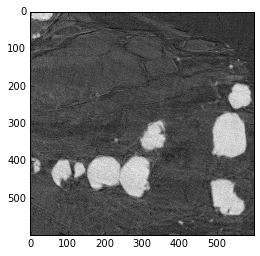

In [5]:
slice_select = 350
plt.imshow(demo_vol_crop[slice_select,:,:], cmap=plt.cm.gray)
plt.show()

## Apply Median Filter

In [6]:
vol_filter_crop = filtering.median_filter(demo_vol_crop, size=[5,5,5])


In [7]:
vol_seg_crop = thresholding.thresh_globalGT(vol_filter_crop, 10000).astype(np.int32)

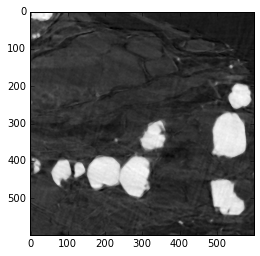

In [8]:
plt.imshow(vol_filter_crop[slice_select,:,:], cmap=plt.cm.gray)
plt.show()

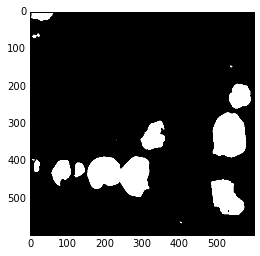

In [9]:
plt.imshow(vol_seg_crop[slice_select,:,:], cmap=plt.cm.gray)
plt.show()

In [10]:
vol_seg_crop.dtype

dtype('int32')

## Morphological Closing: Remove noise

In [11]:
vol_close_crop = morphology.binary_opening(vol_seg_crop, iterations=5).astype(np.int8)*254

In [12]:
vol_close_crop.dtype
np.amax(vol_close_crop)

254

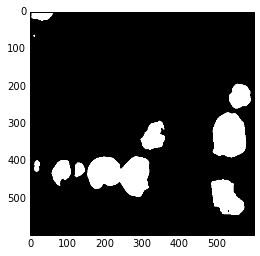

In [13]:
plt.imshow(vol_close_crop[slice_select,:,:], cmap=plt.cm.gray)
plt.show()

In [18]:
src_vol_crop_fname = "032_Shale-E701_AbvFe_gScale_crop.tif"
med_fltr_fname = "032_Shale-E701_AbvFe_mFilter_gScale_crop.tif"
seg_vol_fname = "032_Shale-E701_AbvFe_seg_binary_crop.tif"
morph_open_fname = "032_Shale-E701_AbvFe_seg_binary_open_crop.tif"
data_sets = [demo_vol_crop, vol_filter_crop, vol_seg_crop, vol_close_crop]
data_paths = [src_vol_crop_fname, med_fltr_fname, seg_vol_fname, morph_open_fname]
for _ in range(len(data_sets)):
    src_file_path = file_path+data_paths[_]
    skxray.io.tiff_io.save_tiff(src_file_path, data_sets[_])

In [ ]:
vol_close_crop.dtype
vol_close_crop.shape
#skxray.io.tiff_io.save_tiff(morph_open_fname, vol_close)

In [ ]:
vol_close_crop.dtype


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid

# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces = measure.marching_cubes(ellip_double, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.show()